In [1]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

from IPython.display import display, HTML

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold


from sklearn.linear_model import LogisticRegression


# Never Classification Metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
#Modify this path according to your system path : Where you kept ur python notebook file
# MySelf
data = "/Users/sanjayk/Dropbox/Work/Careerera/Final/ML/data/"
#downloading the headbrain.csv file
kaggle.api.authenticate()
kaggle.api.dataset_download_files("nancyalaswad90/breast-cancer-dataset", unzip=True)   
#kaggle.api.dataset_download_files("nancyalaswad90/breast-cancer-dataset", unzip=True,path=data)  

In [4]:
df = pd.read_csv('data/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(f'Size of the dataset : {df.shape}')

Size of the dataset : (569, 32)


In [6]:
print('{:30} : {:>15} : {:>15}' .format('Feature Name', 'Null Values', 'Unique Values'))
print('*'*70)
for name in df.columns:
    print(f'{name:30} : {df[name].isna().sum():15} : {df[name].nunique():15}')

Feature Name                   :     Null Values :   Unique Values
**********************************************************************
id                             :               0 :             569
diagnosis                      :               0 :               2
radius_mean                    :               0 :             456
texture_mean                   :               0 :             479
perimeter_mean                 :               0 :             522
area_mean                      :               0 :             539
smoothness_mean                :               0 :             474
compactness_mean               :               0 :             537
concavity_mean                 :               0 :             537
concave_points_mean            :               0 :             542
symmetry_mean                  :               0 :             432
fractal_dimension_mean         :               0 :             499
radius_se                      :               0 :        

In [7]:
# remove the id column from data frame
df.drop('id',axis=1,inplace=True)

In [8]:
# how to convert  a Ordinal output category 

In [9]:
# 2. Label Encoder from Scikit Learn Module
ylabel = df['diagnosis']
le =  LabelEncoder()
le.fit(ylabel)
df['diagnosis'] = le.transform(ylabel)
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
# Independent Variables
X = df.drop('diagnosis',axis=1)

# dependent Variables
y =  df[['diagnosis']].values

## Different Type of Sampling to use

In [11]:
# Random Sampling to choose training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42)

# Stratified Sampling to choose training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=54,stratify=y)

#help(GridSearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [12]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
              'solver': ['lbfgs', 'liblinear','newton-cg','sag','saga'],
              'C' : [ 0.1, 1.0, 10.0],
              'tol' : [ 0.00001, 0.0001, 0.001 ],
              'max_iter' : [100, 1000] 
             }

clf = LogisticRegression()
gs = GridSearchCV(clf, parameters)
gs.fit(X,y)

# Get the best parameters and estimator
print(f'Best Parameter : {gs.best_params_}')
print(f'Best Estimator : {gs.best_estimator_}')

Best Parameter : {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Best Estimator : LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)


## Best Parameters for any Classifier Kernel for dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=54, stratify=y)

#Changing the random state means: Changing Different Training and Testing Samples
clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy of Logisitic Regression : {accuracy_score(y_pred,y_test)*100:0.2f}%')

Accuracy of Logisitic Regression : 97.66%


In [14]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,0.05636,...,16.210,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,...,14.670,16.93,94.17,661.1,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794
562,15.220,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.14090
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.193700,0.146900,0.1634,0.07224,...,20.330,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.730,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.1613,0.35680,0.40690,0.18270,0.3179,0.10550
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
139,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,...,11.920,15.77,76.53,434.0,0.1367,0.18220,0.08669,0.08611,0.2102,0.06784


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=5, stratify=y)

clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy of Logisitic Regression : {accuracy_score(y_pred,y_test)*100:0.2f}%')

Accuracy of Logisitic Regression : 95.32%


In [16]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
133,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.059330,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.1223,0.19490,0.170900,0.137400,0.2723,0.07071
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.711900,0.265400,0.4601,0.11890
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.23380,0.168800,0.081940,0.2268,0.09082
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.061940,0.032640,0.3059,0.07626
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.1475,0.19790,0.142300,0.080450,0.3071,0.08557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.023430,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.243900,0.064930,0.2372,0.07242
285,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
464,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.19650,0.187600,0.104500,0.2235,0.06925
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.17880,0.256000,0.122100,0.2889,0.08006


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=12, stratify=y)

clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy of Logisitic Regression : {accuracy_score(y_pred,y_test)*100:0.2f}%')

Accuracy of Logisitic Regression : 97.08%


In [18]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,...,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
100,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.05871,...,16.990,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,13.340,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174
39,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,...,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,13.450,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121
107,12.360,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.019210,0.1602,0.06066,...,13.290,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490


## Cross Validation:

-     How could u say that ML Model predicts xx.yy% as Accuracy for any given Test Sample from the dataset


In [19]:
#help(cross_val_score)

### 1.Call cross_val_score with cv value

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [78]:
clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'Accuracy of Logisitic Regression  : {scores.mean()*100:0.2f}% +- {scores.std()*100:0.2f}%')

scores = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(f'Precision of Logisitic Regression : {scores.mean()*100:0.2f}% +- {scores.std()*100:0.2f}%')

scores = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(f'Recall of Logisitic Regression    : {scores.mean()*100:0.2f}% +- {scores.std()*100:0.2f}%')

scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f'F1-Score of Logisitic Regression  : {scores.mean()*100:0.2f}% +- {scores.std()*100:0.2f}%')

Accuracy of Logisitic Regression  : 95.96% +- 1.31%
Precision of Logisitic Regression : 94.90% +- 2.17%
Recall of Logisitic Regression    : 94.84% +- 2.69%
F1-Score of Logisitic Regression  : 94.84% +- 1.76%


### 2. Different Splitter   KFold/StratifiedKFold for cross validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [21]:
clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f'Accuracy of Logisitic Regression : {scores.mean()*100:0.2f}% +- {scores.std()*100:0.2f}%')

Accuracy of Logisitic Regression : 96.48% +- 2.02%


### Metric to measure Classification : 
        - Confusion Matrix
        - Accuracy
        - Precision
        - Recall
        - F1-Score
        - Classification Report
        - AUC

### Confusuon Matrix 
    - Binary Class : [0,1] : SIZE (2,2)
    - Multi-Clas : 
        [0,1,2] : SIZE (3,3)
        [0,1,2,3] : SIZE (4,4)
        [0,1,2,3,4] : SIZE (5,5)

        Actual Value (y_test)      :    0            |    1
                                   -------------------------------------
        Prediction   (y_pred)   0  |  True Negative  |  False Negative | 
                                   -------------------------------------
                                1  |  False Positive |  True Positive  |
                                   -------------------------------------

### Accuracy: The proportion of actual correct prediction
        Accuracy     = (TP + TN) / (TP + FP + TN + FN)
### Precision: The proportion of predicted positive classes was actually positive 
        Precision   =  TP  / ( TP+FP)
### Sensitivity/Recall: The proportion of actual positive classes was predicted correctly 
        Recall       =  TP / (TP + FN)
### Specificity: The proportion of actual negative classes was predicted correctly. 
        Specificity = TN / (TN + FP)
### Fscore: f1-scores closer to 1 are a better model because balance precision and recall.
        F1-Score     =  2 * Recall * Precision / (Recall + Precision)

### AUC_ROC (Area Under Receiver operating characteristics curve)
    - for : False Positive Rate
    - tpr : True Positive Rate 
    - roc_auc_score : 
    - roc_curve : 
    
### Classification Report: Summary of Each Class Precision, Recall, Support Sampes and Accuracy and F1-Scores (macro, micro,weighted)

https://www.aitude.com/8-important-evaluation-metrics-for-classification-models/


https://www.v7labs.com/blog/f1-score-guide

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42, stratify=y)
clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear', tol=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [23]:
print(f'Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[105,   2],
       [  8,  56]])

In [73]:
print(f'Accuracy  : {accuracy_score(y_test, y_pred):0.3f}')
print(f'Precision : {precision_score(y_test, y_pred):0.3f}')
print(f'Recall    : {recall_score(y_test, y_pred):0.3f}')
print(f'F1-Score  : {f1_score(y_test, y_pred):0.3f}')
print(f'ROC Score : {roc_auc_score(y_test,y_pred):0.3f}')
print(classification_report(y_test,y_pred))

Accuracy  : 0.942
Precision : 0.966
Recall    : 0.875
F1-Score  : 0.918
ROC Score : 0.928
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [67]:
newsample = np.reshape(X.loc[50].values, (-1, 30))
clf.predict_proba(newsample)

array([[0.99818454, 0.00181546]])

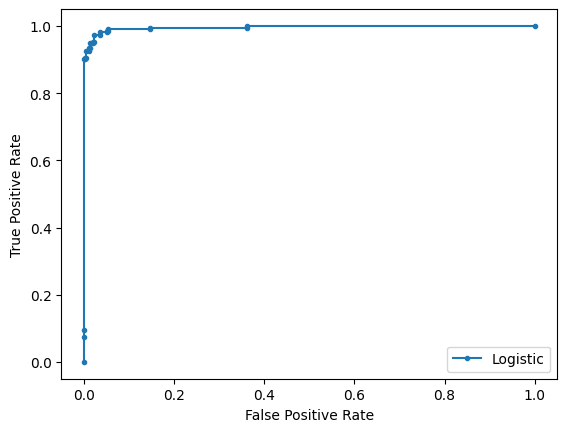

In [70]:
lr_probs = clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
lr_auc = roc_auc_score(y, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()